# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import datetime as dt
from scipy.stats import linregress
import json
from ratelimit import limits
# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)

output_data_file = (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv")
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#limit calls per minute
url = "http://api.openweathermap.org/data/2.5/weather?"
one_minute = 60

@limits(calls=60, period=one_minute)
def call_api(url):
    response = requests.get(query_url)

    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    return response

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Exploratory test 
test =  ["Houston"]
results = []
for city in test:
    query_url = f"{url}appid={api_key}&q={city}"
    response = requests.get(query_url)
    response_json = response.json()
print (json.dumps(response_json, indent = 4))   
print(response_json)
#test retrieval of data using test city
weather_id=response_json["weather"][0]["id"]
city_id = response_json["id"]
city_name_test = response_json["name"]
print(city_id,city_name_test)

{
    "coord": {
        "lon": -95.36,
        "lat": 29.76
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 286.07,
        "feels_like": 283.53,
        "temp_min": 285.15,
        "temp_max": 286.48,
        "pressure": 1022,
        "humidity": 58
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.98,
        "deg": 47
    },
    "clouds": {
        "all": 40
    },
    "dt": 1607204685,
    "sys": {
        "type": 1,
        "id": 4850,
        "country": "US",
        "sunrise": 1607173375,
        "sunset": 1607210524
    },
    "timezone": -21600,
    "id": 4699066,
    "name": "Houston",
    "cod": 200
}
{'coord': {'lon': -95.36, 'lat': 29.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 286.07, '

In [4]:

#
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name = []
lat =[]
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date = []
# Loop through each city
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}"
    
    try: 
        loop_response = requests.get(query_url).json()
        city_name.append(loop_response["name"])
        lat.append(loop_response["coord"]["lat"])
        lng.append(loop_response["coord"]["lon"])
        max_temp.append(loop_response["main"]["temp_max"])
        humidity.append(loop_response["main"]["humidity"])
        cloudiness.append(loop_response["clouds"]["all"])
        wind_speed.append(loop_response["wind"]["speed"])
        country.append(loop_response["sys"]["country"])
        date.append(loop_response["dt"])                    
        print(loop_response["id"],loop_response["name"])
    except:
        print("Not found.")
        pass

4032243 Vaini
3423146 Ilulissat
5122534 Jamestown
1853483 Oyama
2630299 Hofn
2015306 Tiksi
3833367 Ushuaia
Not found.
6201424 Mataura
Not found.
3372707 Ribeira Grande
2206939 Bluff
6355222 Yulara
3372472 Vila Franca do Campo
3874787 Punta Arenas
4020109 Atuona
3418910 Upernavik
2075265 Busselton
5848280 Kapaa
2562619 Saint Lawrence
3420768 Qasigiannguit
2206874 Waipawa
2121385 Severo-Kuril'sk
2027244 Bagdarin
3927995 Tambo
2074865 Carnarvon
2171099 Codrington
2208248 Kaitangata
3932145 Pisco
2155415 New Norfolk
3466165 Cidreira
3146487 Raudeberg
1857968 Kuwana
2112802 Hasaki
157247 Kintinku
4030556 Rikitea
5364271 Laguna
Not found.
3870282 Talcahuano
1015776 Bredasdorp
3115824 Muros
6185377 Yellowknife
5880054 Barrow
3137469 Sørland
2194098 Ahipara
602913 Skellefteå
2270385 Camacha
2173125 Burnie
5106841 Albany
3393692 Itarema
4202810 Jesup
2156643 Mount Gambier
Not found.
Not found.
5379439 Ontario
893549 Chipinge
933995 Souillac
2111884 Miyako
5847411 Kahului
585220 Qusar
4759556 Fo

118063 Sabzawār
2460954 Araouane
2013279 Vostok
3346821 Ondjiva
Not found.
1082243 Ambilobe
3841490 Pergamino
2357163 Nouna
1028434 Quelimane
Not found.
2123278 Mil'kovo
2239862 Malanje
3412093 Vestmannaeyjar
2189343 Kaeo
1720223 Callaguip
2455517 Kayes
1254709 Tezu
591632 Kärdla
4019054 Ajijic
3664321 Eirunepé
1591474 Bac Lieu
2278158 Buchanan
3692020 Saquena
314830 Gaziantep
3435261 Concordia
1580240 Hue
3414079 Olafsvik
Not found.
6180285 Whitecourt
2449066 Tombouctou
5836898 Rock Springs
3936456 Lima
53654 Mogadishu
3405215 Bonfim
1805833 Jiexiu
1510689 Baykit
4036284 Alofi
3127460 Burgos
Not found.
1513491 Yangi Marg`ilon
153412 Mlandizi
2172880 Byron Bay
Not found.
3653967 Muisne
2019004 Novaya Igirma
2542997 Marrakesh
116996 Sari
362973 Abnūb
3107775 Torrelavega
3919998 Cobija
4193042 Effingham County
1855540 Naze
3946820 Barranca
Not found.
1252795 Yanam
5478673 Meadow Lake
3855065 General Roca
526504 Milyutinskaya
4021858 Guerrero Negro
Not found.
5044290 Saint Anthony
133595 

In [5]:
#Check to make sure names were appended
print(city_name)

['Vaini', 'Ilulissat', 'Jamestown', 'Oyama', 'Hofn', 'Tiksi', 'Ushuaia', 'Mataura', 'Ribeira Grande', 'Bluff', 'Yulara', 'Vila Franca do Campo', 'Punta Arenas', 'Atuona', 'Upernavik', 'Busselton', 'Kapaa', 'Saint Lawrence', 'Qasigiannguit', 'Waipawa', "Severo-Kuril'sk", 'Bagdarin', 'Tambo', 'Carnarvon', 'Codrington', 'Kaitangata', 'Pisco', 'New Norfolk', 'Cidreira', 'Raudeberg', 'Kuwana', 'Hasaki', 'Kintinku', 'Rikitea', 'Laguna', 'Talcahuano', 'Bredasdorp', 'Muros', 'Yellowknife', 'Barrow', 'Sørland', 'Ahipara', 'Skellefteå', 'Camacha', 'Burnie', 'Albany', 'Itarema', 'Jesup', 'Mount Gambier', 'Ontario', 'Chipinge', 'Souillac', 'Miyako', 'Kahului', 'Qusar', 'Forest', 'Torbay', 'Chokurdakh', 'Lebu', 'Bitkine', 'Tura', 'Norman Wells', 'Rio Grande', 'Hudson Bay', 'Saint-Philippe', 'Cabo San Lucas', 'Ashland', 'Makkah al Mukarramah', 'Airai', 'Pacific Grove', 'Jalu', 'Butaritari', 'Ullapool', 'Hilo', 'Pevek', 'Henties Bay', 'Qaanaaq', 'Tilichiki', 'Ponta do Sol', 'Hermanus', 'Rakitovo', 'T

In [6]:
#Check to make sure dates were appended since last list
print(date)

[1607205172, 1607205106, 1607205103, 1607205172, 1607205172, 1607205103, 1607205107, 1607205106, 1607205107, 1607205104, 1607205173, 1607205173, 1607205106, 1607205103, 1607205173, 1607205106, 1607205103, 1607205173, 1607205173, 1607205173, 1607205173, 1607205173, 1607205173, 1607205103, 1607205173, 1607205173, 1607205174, 1607205174, 1607205174, 1607205174, 1607205174, 1607205174, 1607205174, 1607205106, 1607205174, 1607205174, 1607205105, 1607205174, 1607205045, 1607205106, 1607205174, 1607205174, 1607205174, 1607205174, 1607205175, 1607205105, 1607205175, 1607205175, 1607205104, 1607205175, 1607205175, 1607205175, 1607205175, 1607205175, 1607205175, 1607205175, 1607205104, 1607205104, 1607205106, 1607205175, 1607205176, 1607205107, 1607205176, 1607205176, 1607205176, 1607205100, 1607205176, 1607205003, 1607205176, 1607205176, 1607205176, 1607205104, 1607205176, 1607204822, 1607205106, 1607205104, 1607205106, 1607205176, 1607205104, 1607205106, 1607205177, 1607205177, 1607204833, 160

In [7]:
#Check loop response
print(loop_response)

{'coord': {'lon': 148.23, 'lat': -20.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.15, 'feels_like': 301.41, 'temp_min': 298.15, 'temp_max': 298.15, 'pressure': 1012, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 210}, 'clouds': {'all': 79}, 'dt': 1607205207, 'sys': {'type': 1, 'id': 9503, 'country': 'AU', 'sunrise': 1607195980, 'sunset': 1607243811}, 'timezone': 36000, 'id': 2174444, 'name': 'Bowen', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
}
weather_df = pd.DataFrame(city_dict)
weather_df.to_csv(r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Whats-The-Weather-Like\WeatherPy\Data\cities.csv", index = False)
weather_df.head()

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      Vaini -21.20 -175.20    299.15        83          75        4.60   
1  Ilulissat  69.22  -51.10    273.15        96          75        5.10   
2  Jamestown  42.10  -79.24    273.71        92          90        3.10   
3      Oyama  36.30  139.80    279.82       100          20        1.50   
4       Hofn  64.25  -15.21    270.18        89          46        4.86   

  Country        Date  
0      TO  1607205172  
1      GL  1607205106  
2      US  1607205103  
3      JP  1607205172  
4      IS  1607205172

In [9]:
weather_df.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  552.000000  552.000000  552.000000  552.000000  552.000000  552.000000   
mean    19.757174   20.572536  284.344728   73.865942   50.817029    3.502047   
std     33.245965   90.220278   14.776074   20.241109   39.325080    2.358296   
min    -54.800000 -179.170000  238.600000    4.000000    0.000000    0.140000   
25%     -7.975000  -60.105000  275.765000   64.000000    5.750000    1.607500   
50%     26.605000   22.725000  288.150000   78.000000   52.000000    3.000000   
75%     46.445000  100.375000  296.925000   88.250000   90.000000    5.100000   
max     78.220000  179.320000  306.150000  100.000000  100.000000   13.820000   

               Date  
count  5.520000e+02  
mean   1.607205e+09  
std    7.870947e+01  
min    1.607204e+09  
25%    1.607205e+09  
50%    1.607205e+09  
75%    1.607205e+09  
max    1.607205e+09

In [10]:
len(weather_df)

552

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Skipping step since max humidity = 100 (commented out process I would take if I did have humidity >100, using drop method)

In [11]:
#  Get the indices of cities that have humidity over 100%.
#high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
#high_humidity

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = weather_df.drop(index = , inplace =False)
#clean_city_data

In [13]:
#Creating clean city data using loc to make sure
under_100 = weather_df.loc[weather_df["Humidity"]<= 100]
clean_city_data = under_100
clean_city_data

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0         Vaini -21.20 -175.20    299.15        83          75        4.60   
1     Ilulissat  69.22  -51.10    273.15        96          75        5.10   
2     Jamestown  42.10  -79.24    273.71        92          90        3.10   
3         Oyama  36.30  139.80    279.82       100          20        1.50   
4          Hofn  64.25  -15.21    270.18        89          46        4.86   
..          ...    ...     ...       ...       ...         ...         ...   
547     Agüimes  27.91  -15.45    290.37        87          40        6.20   
548  San Felipe  10.34  -68.74    296.72        90          54        1.97   
549   Ugoofaaru   5.67   73.00    300.94        77         100        5.69   
550      Nurota  40.56   65.69    262.15        66           0        1.00   
551       Bowen -20.02  148.23    298.15        73          79        0.50   

    Country        Date  
0        TO  1607205172  
1        GL  1607205106  
2        US  1607205103  
3        JP  1607205172  
4        IS  1607205172  
..      ...         ...  
547      ES  1607205207  
548      VE  1607205207  
549      MV  1607205207  
550      UZ  1607205207  
551      AU  1607205207  

[552 rows x 9 columns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

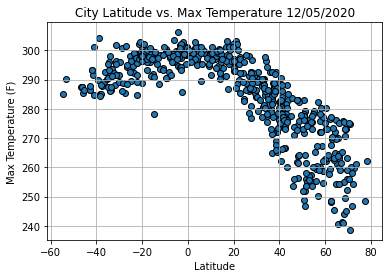

In [14]:
latitude = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, max_temp, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

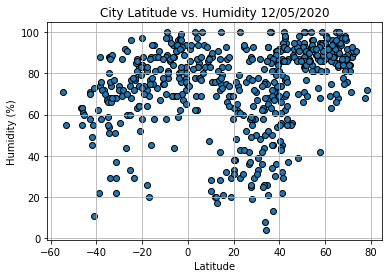

In [15]:
latitude = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, humidity, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Humidity.png")
plt.show()

In [16]:
#Describe results

## Latitude vs. Cloudiness Plot

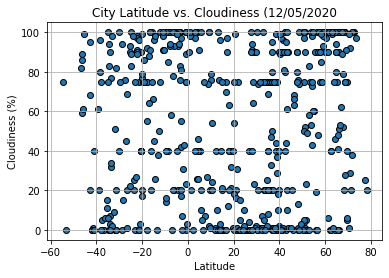

In [17]:
latitude = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, cloudiness, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Cloudiness.png")
plt.show()

In [18]:
#Describe results

## Latitude vs. Wind Speed Plot

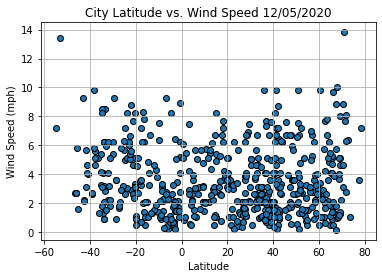

In [19]:
latitude = clean_city_data["Lat"]
winds = clean_city_data["Wind Speed"]
curr_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.scatter(latitude, winds, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {curr_date}")
plt.grid(True)
plt.savefig("City Latidude vs. Wind Speed.png")
plt.show()

In [20]:
#Describe results

## Linear Regression

In [21]:
#Use loc to get data for each hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7194308470529918


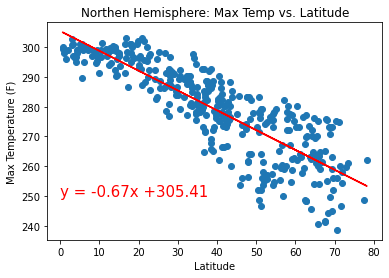

In [22]:
north_lat = northern_hemisphere["Lat"]
north_max_temp =northern_hemisphere["Max Temp"]
plt.scatter(north_lat, north_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Northen Hemisphere: Max Temp vs. Latitude")

# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_max_temp)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(0,250), fontsize = 15, color = "red")
plt.savefig("Northen Hemisphere-Max Temp vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [23]:
# Describe Results

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.33811055058026


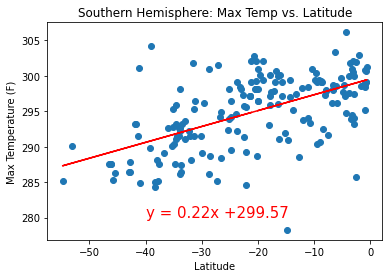

In [39]:
south_lat = southern_hemisphere["Lat"]
south_max_temp = southern_hemisphere["Max Temp"]
plt.scatter(south_lat, south_max_temp)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
# Perform a linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_max_temp)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq,(-40,280), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Max Temp vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [25]:
#Describe results

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11283715194138595


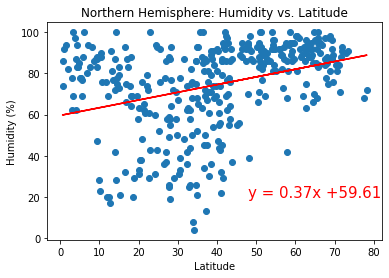

In [42]:
north_lat = northern_hemisphere["Lat"]
north_humidity =northern_hemisphere["Humidity"]
plt.scatter(north_lat,north_humidity)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Humidity vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_humidity)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (48,20), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [27]:
#Describe the results

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1906948277846328


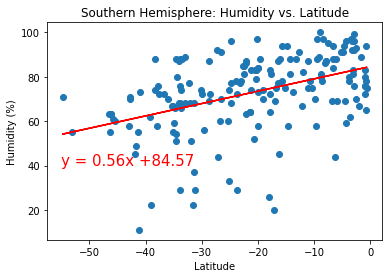

In [43]:
south_lat = southern_hemisphere["Lat"]
south_humidity = southern_hemisphere["Humidity"]
plt.scatter(south_lat,south_humidity)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Humidity vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_humidity)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (-55,40), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [29]:
#Describe the results

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06924142308315864


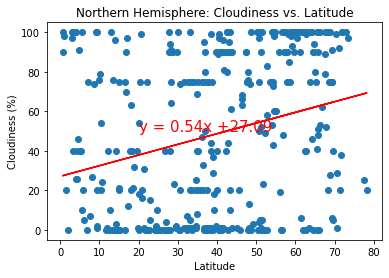

In [46]:
north_lat = northern_hemisphere["Lat"]
north_cloudiness =northern_hemisphere["Cloudiness"]
plt.scatter(north_lat,north_cloudiness)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloudiness)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (20,50), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Cloudiness vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [31]:
# Describe the results

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06087762869308928


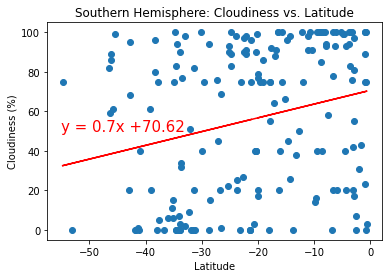

In [47]:
south_lat = southern_hemisphere["Lat"]
south_cloudiness = southern_hemisphere["Cloudiness"]
plt.scatter(south_lat,south_cloudiness)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloudiness)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (-55,50), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Humidity vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [33]:
# Describe the results

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010360773819070744


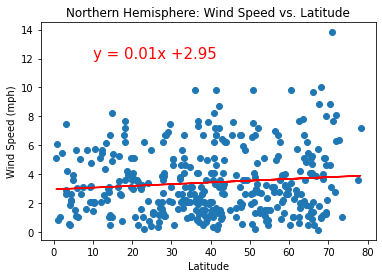

In [48]:
north_lat = northern_hemisphere["Lat"]
north_winds =northern_hemisphere["Wind Speed"]
plt.scatter(north_lat,north_winds)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_winds)
fit = slope * north_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(north_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (10,12), fontsize = 15, color = "red")
plt.savefig("Northern Hemisphere-Wind Speed vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [35]:
# Describe the results

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09444784542092399


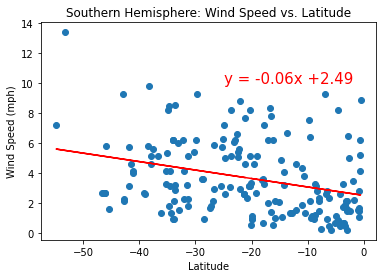

In [36]:
south_lat = southern_hemisphere["Lat"]
south_winds = southern_hemisphere["Wind Speed"]
plt.scatter(south_lat,south_winds)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_winds)
fit = slope * south_lat + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Put the line of best fit over the scatter plot and add the equation
plt.plot(south_lat, fit,"r-", color = "red")
plt.annotate(line_eq, (-25,10), fontsize = 15, color = "red")
plt.savefig("Southern Hemisphere-Wind Speed vs. Latitude.png")
print(f"The r-value is: {rvalue**2}")
#plt.show()

In [37]:
# Describe the results